In [ ]:
import tensorflow as tf

In [ ]:
#!pip install -q keras

In [ ]:
from keras import layers
from keras import losses
from keras import regularizers
from keras import preprocessing

In [ ]:
from keras.preprocessing.text import Tokenizer # text to sequence of integers
from keras.utils import pad_sequences

In [ ]:
import os
import re
import string

import pandas as pd
import numpy as np

from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
main_data=pd.read_csv("train (1).csv")
data=main_data.copy()
data.drop(columns=['id'],axis=1,inplace=True)
data

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
21597,0,i'm so today my small #cousin got his first ...
21598,0,"for #rohingya, fear and forced marriages #traf..."
21599,0,birds &amp; bad #piggies #finger family \ #n...
21600,0,"now that #bfestbuzz is winding down, get for..."


In [ ]:
data.shape

(21602, 2)

,label
0,20109
1,1493


0s : 1s  ::   13.47 : 1


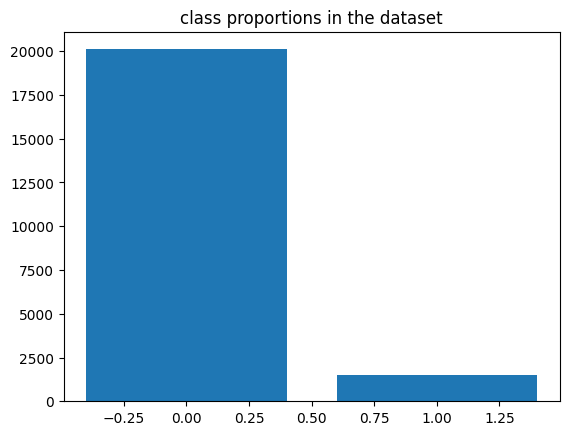

In [ ]:
#Check class distribution in dependent variable
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

,label
0,20109
1,4479


0s : 1s  ::   4.49 : 1


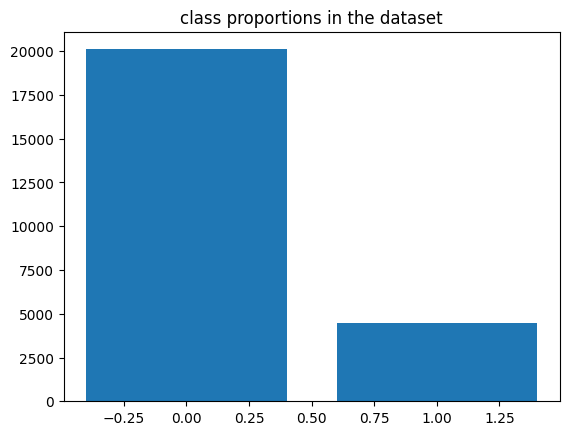

In [ ]:
#Balancing the dataset using Oversampling
data1=data[data['label']==1]
data0=data[data['label']==0]
data=pd.concat([data,data1,data1], axis=0)
data

#Check class distribution in dependent variable again
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)


def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

In [ ]:
#preprocess train dataset
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['Num_words_text'] = data['tweet'].apply(lambda x:len(str(x).split()))

train_data,test_data= train_test_split(data, test_size=0.2)
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)
train_data

,label,tweet,Num_words_text
0,0,user waiting watch orangeisthenewblack done with days bingewatch netflix netflixandchill,10
1,0,this song fcking awesome thrilled album cantwait palyhappy,8
2,0,prayfororlando pulseshooting pulse gaypride cant believe what witnessing this morning deepest condolences,12
3,0,adels favourite place ð¢ð¡ agameoftones ink361 instadaily followâ¦,8
4,0,user gotta love little fruit humor saturday fellow food wine lovers,11
...,...,...,...
19665,0,yeah good bing bong bing bong,6
19666,0,live life discover great adventures worldwide create real travel bucketlist traveltuesday,11
19667,1,user should take action against your filthy plantation location manager what disgraceful boycott,13
19668,0,happy bihday meeeeeee june junebaby bday bdaytome beautiful cakeâ¦,9


In [ ]:
#classes proportion in dependent variable in train and test dataset
print('===========Train Data =========')
print(train_data['label'].value_counts())
print(len(train_data))
print('==============================')

print('===========Test Data =========')
print(test_data['label'].value_counts())
print(len(test_data))
print('==============================')

===========Train Data =========
0    16075
1     3595
Name: label, dtype: int64
19670
===========Test Data =========
0    4034
1     884
Name: label, dtype: int64
4918


In [ ]:
#train and validation dataset splitting
X_train, X_valid, y_train, y_valid = train_test_split(train_data['tweet'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.2,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:15736
Class distributionCounter({0: 12860, 1: 2876})
Valid data len:3934
Class distributionCounter({0: 3215, 1: 719})


In [ ]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)

In [ ]:
#convert sentences to sequences of numbers
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['tweet'].tolist()) )

#padding
maxlen=50
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)


#used for tensor flow dataset preparation
train_labels = np.asarray(y_train)
valid_labels = np.asarray(y_valid)
test_labels = np.asarray(test_data['label'].tolist())


print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))

#tensorflow dataset preparation
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:15736
Class distributionCounter({0: 12860, 1: 2876})
Validation data len:3934
Class distributionCounter({0: 3215, 1: 719})
Test data len:4918
Class distributionCounter({0: 4034, 1: 884})


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[3035  660  265 3036    3   27  189    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
======Validation dataset ====
tf.Tensor(
[ 1206  3513  3224    17    63   443 14488 14489    10   788     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
======Test dataset ====
tf.Tensor(
[ 96   4  35   5  19 121 122 118   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
#model preparation using tensorflow for binary classification
max_features =50000
embedding_dim =16
sequence_length = maxlen

model = tf.keras.Sequential() # sequential model is used to stack sequentially
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) #converting integers to dense vectors
model.add(tf.keras.layers.Dropout(0.4)) #reduce overfitting

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             .bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten()) # conver 3D output from lstm to 2D tensor

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))




model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            800016    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 50, 16)            2112      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               410112    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
16/16 [==============================] - 11s 391ms/step - loss: 3.4593 - binary_accuracy: 0.7804 - val_loss: 2.1323 - val_binary_accuracy: 0.8172
Epoch 2/10
16/16 [==============================] - 4s 263ms/step - loss: 1.6120 - binary_accuracy: 0.8172 - val_loss: 1.0948 - val_binary_accuracy: 0.8172
Epoch 3/10
16/16 [==============================] - 6s 362ms/step - loss: 0.9446 - binary_accuracy: 0.8172 - val_loss: 0.7626 - val_binary_accuracy: 0.8172
Epoch 4/10
16/16 [==============================] - 4s 258ms/step - loss: 0.7328 - binary_accuracy: 0.8172 - val_loss: 0.6476 - val_binary_accuracy: 0.8172
Epoch 5/10
16/16 [==============================] - 5s 312ms/step - loss: 0.6359 - binary_accuracy: 0.8172 - val_loss: 0.5598 - val_binary_accuracy: 0.8172
Epoch 6/10
16/16 [==============================] - 5s 345ms/step - loss: 0.5524 - binary_accuracy: 0.8338 - val_loss: 0.4807 - val_binary_accuracy: 0.8953
Epoch 7/10
16/16 [==============================] - 4s 256ms/st

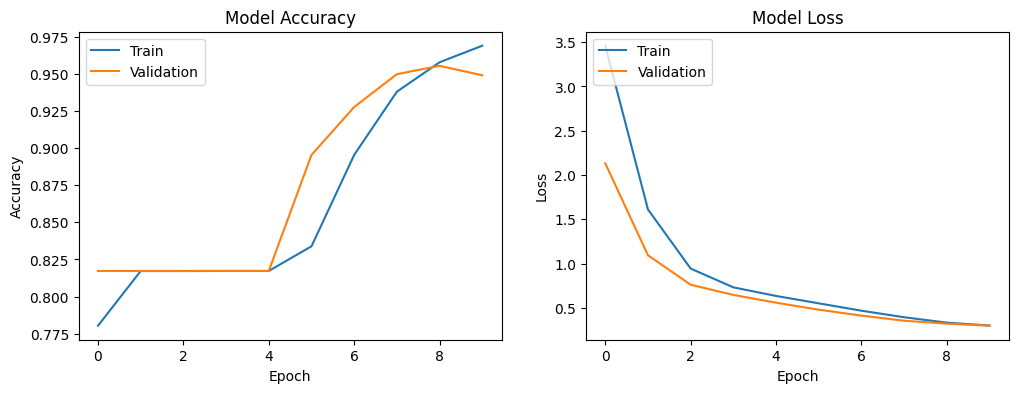

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
#make predictions on validation dataset
valid_predict= model.predict(x_valid)
print(valid_predict[:10])

123/123 [==============================] - 1s 10ms/step
[[1.0812970e-02]
 [3.6004782e-03]
 [9.1936472e-06]
 [2.7252070e-04]
 [1.1514210e-02]
 [8.5685425e-02]
 [2.8005892e-02]
 [7.0053772e-03]
 [1.3382994e-01]
 [2.4752537e-05]]


In [ ]:
x_valid

array([[ 1206,  3513,  3224, ...,     0,     0,     0],
       [22501,   830,   694, ...,     0,     0,     0],
       [    4,   204,    81, ...,     0,     0,     0],
       ...,
       [    2,    55,   712, ...,     0,     0,     0],
       [  295, 24038,  1618, ...,     0,     0,     0],
       [  620,     1,   123, ...,     0,     0,     0]], dtype=int32)

In [ ]:
#model's metrics on test dataset
x_test  = np.array( tokenizer.texts_to_sequences(test_data['tweet'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)


#Generate predictions for all samples
predictions = model.predict(x_test)

154/154 [==============================] - 1s 10ms/step


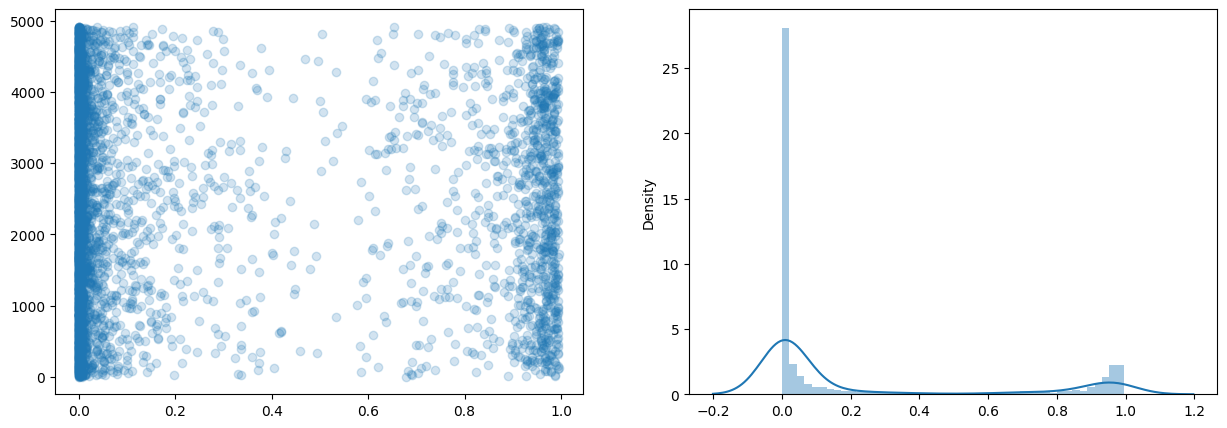

In [ ]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,range(0,len(predictions)),alpha=0.2)
ax2=sns.distplot(predictions)

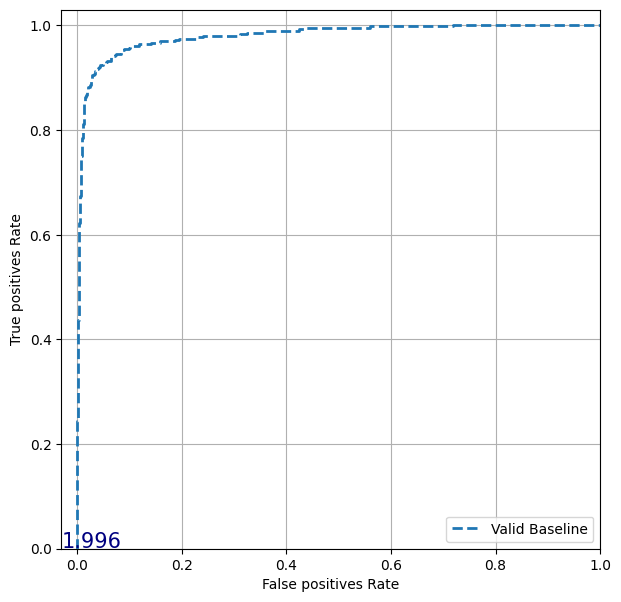

In [ ]:
#decide the cutoff for classifying the predicted probabilities as 1 or 0
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

mpl.rcParams['figure.figsize'] = (7,7)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
cutoff=0.86
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= cutoff),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < cutoff),0,test_data.pred_sentiment)

labels = [0, 1]
print(classification_report(test_data['label'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4034
           1       0.92      0.84      0.88       884

    accuracy                           0.96      4918
   macro avg       0.94      0.91      0.93      4918
weighted avg       0.96      0.96      0.96      4918



In [ ]:
# Testing model on Test dataset

In [ ]:
final_test=pd.read_csv("test.csv")

ftest=final_test.copy()
ftest.drop(columns=['id'],axis=1,inplace=True)

ftest['tweet'] = ftest['tweet'].apply(remove_emoji)
ftest['tweet'] = ftest['tweet'].apply(clean_text)

f_test  = np.array( tokenizer.texts_to_sequences(ftest['tweet'].tolist()) )
f_test = pad_sequences(f_test, padding='post', maxlen=maxlen)

display((x_test))
display((f_test))

array([[  96,    4,   35, ...,    0,    0,    0],
       [ 126, 4360,   94, ...,    0,    0,    0],
       [4022,  137,   43, ...,    0,    0,    0],
       ...,
       [   2,    2,    2, ...,    0,    0,    0],
       [   2, 1558,    2, ...,    0,    0,    0],
       [   9,  330, 1554, ...,    0,    0,    0]], dtype=int32)

array([[    1,     1,  3980, ...,     0,     0,     0],
       [    2,    47,     1, ...,     0,     0,     0],
       [  374,   648,   461, ...,     0,     0,     0],
       ...,
       [    9,    33,   313, ...,     0,     0,     0],
       [  320,   594,   110, ...,     0,     0,     0],
       [  270,  1073, 15964, ...,     0,     0,     0]], dtype=int32)

In [ ]:
#predict on actual test data
predictions = model.predict(f_test)

538/538 [==============================] - 7s 13ms/step


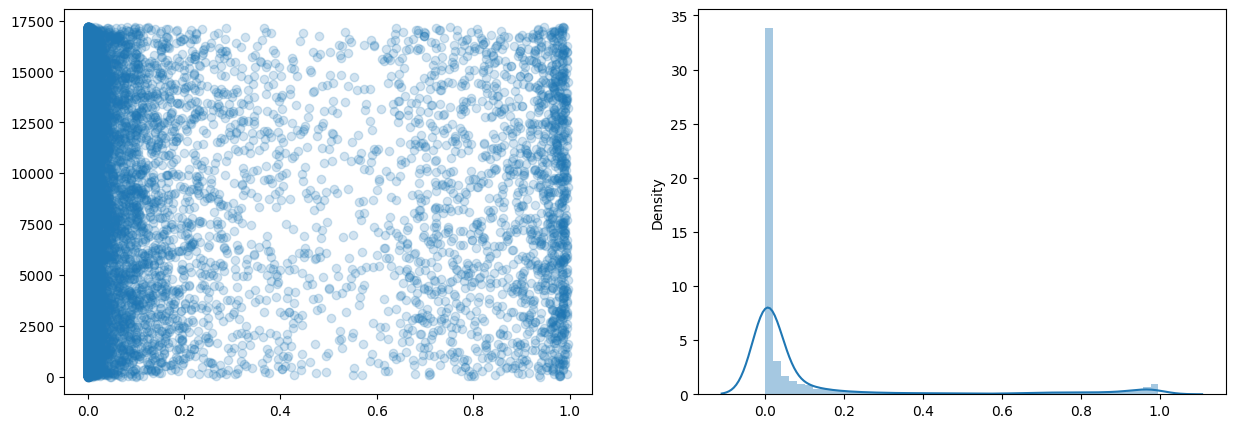

In [ ]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,ftest.index,alpha=0.2)
ax2=sns.distplot(predictions)

In [ ]:
#mapping prediction to 1 or 0
ftest['pred_sentiment']= predictions
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment >= cutoff),1,ftest.pred_sentiment)
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment < cutoff),0,ftest.pred_sentiment)

#processed tweets categorized as hate speech
pd.set_option('display.max_colwidth', None)
ftest[ftest['pred_sentiment']==1]

,tweet,pred_sentiment
1,user white supremacists want everyone birdsâ movie hereâs,1.0
19,thought factory neutrality right wing fascism politics media brexit trump leadership,1.0
26,chick gets fucked hottest naked lady,1.0
33,suppo taiji fisherman bullying racism tweet4taiji thecove seashepherd,1.0
81,user user user user user more feeding public trough piggy michelleobamaâ¦,1.0
...,...,...
17128,user governmentâs antisemitism definition conflates with valid criticism israel opendemocracy,1.0
17148,grew fucked upð¤ fucked upð¥ believing better place fucking upð© âï¸,1.0
17176,user user most racist ever,1.0
17188,black professor demonizes proposes nazi style confiscation white assets like 1930s germany breaking,1.0


In [ ]:
#actual tweets categorized as hate speech
final_test.iloc[ftest[ftest['pred_sentiment']==1].index]

,id,tweet
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
19,31982,thought factory: bbc neutrality on right wing fascism #politics #media #blm #brexit #trump #leadership &gt;3
26,31989,chick gets fucked hottest naked lady
33,31996,suppo the #taiji fisherman! no bullying! no racism! #tweet4taiji #thecove #seashepherd
81,32044,@user .@user @user @user @user &lt;--- no more feeding at the public trough piggy. #michelleobamaâ¦
...,...,...
17128,49091,@user the uk governmentâs new #anti-semitism definition conflates with valid criticism of #israel | opendemocracy
17148,49111,we grew up fucked upð¤ its fucked upð¥ i'm believing you in a better place but it's fucking me upð© Ã¨ âï¸
17176,49139,@user @user are the most racist pay ever!!!!!
17188,49151,"black professor demonizes, proposes nazi style confiscation of ""white"" assets; like 1930's germany #breaking"
